<a href="https://colab.research.google.com/github/AryaJeet1364/QuantumComputing/blob/main/DeutschAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit -q
!pip install qiskit[visualization] -q
!pip install qiskit-aer -q

Deutsch Algorithm Demo (Quantum > Classical!)
--------------------------------------------------
f(x) = 0             ➝ CONSTANT
f(x) = 1             ➝ CONSTANT
f(x) = x             ➝ BALANCED
f(x) = ¬x            ➝ BALANCED

Classical method would require 2 queries per function.
Quantum method pulls it off with just ONE query. 🎯

HOW IT WORKS (Deutsch Algorithm):

1. We set up two qubits: one input and one ancilla (used for magic).
2. We apply Hadamards to create a mix of inputs — quantum superposition.
3. We run the oracle, which flips phase based on f(x) (this is the tricky part).
4. Another Hadamard on the input qubit causes interference.
5. A final measurement tells us everything:
   - If we get 0 → f is constant
   - If we get 1 → f is balanced

All this with just ONE call to the function. Quantum flex 😎


Circuit diagrams and measurements:

Function: f(x) = 0
Prediction: CONSTANT
Counts: {'0': 1000}


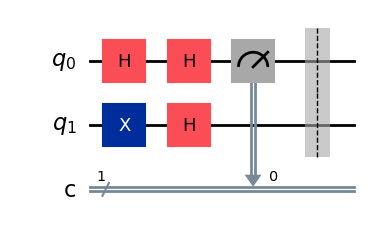


Function: f(x) = 1
Prediction: CONSTANT
Counts: {'0': 1000}


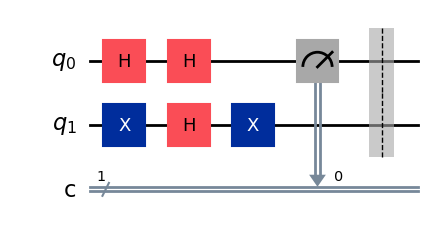


Function: f(x) = x
Prediction: BALANCED
Counts: {'1': 1000}


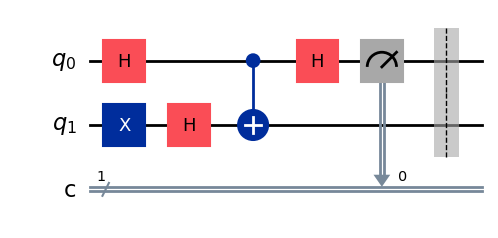


Function: f(x) = ¬x
Prediction: BALANCED
Counts: {'1': 1000}


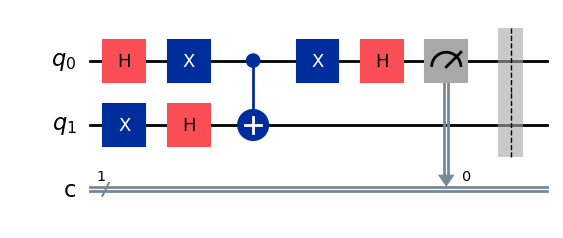

In [2]:
# Deutsch's Algorithm using Qiskit
# ---------------------------------------
# The goal: Figure out if a hidden function f(x): {0,1} → {0,1} is
# either constant (same result for both inputs) or balanced (different results).
# Quantum computers can solve this in ONE query. Classical needs two.

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline


# Build the oracle for different types of functions
def create_oracle(ftype):
    oracle = QuantumCircuit(2, name=f'Oracle_{ftype}')

    if ftype == 'constant_0':
        # f(x) = 0 for all x → do nothing
        pass

    elif ftype == 'constant_1':
        # f(x) = 1 for all x → flip the ancilla every time
        oracle.x(1)

    elif ftype == 'balanced_id':
        # f(x) = x → flip ancilla if input is 1
        oracle.cx(0, 1)

    elif ftype == 'balanced_not':
        # f(x) = not x → flip input, then CNOT, then flip input back
        oracle.x(0)
        oracle.cx(0, 1)
        oracle.x(0)

    return oracle


# Build the full Deutsch algorithm circuit
def deutsch_algorithm(oracle):
    qc = QuantumCircuit(2, 1)  # 2 qubits, 1 classical bit

    # Start with |0⟩|1⟩ → apply Hadamards to create superposition
    qc.x(1)      # ancilla in |1⟩
    qc.h(0)
    qc.h(1)

    # Plug in the oracle
    qc = qc.compose(oracle)

    # Apply Hadamard again to the input qubit
    qc.h(0)

    # Measure input qubit only (we don’t care about the ancilla)
    qc.measure(0, 0)

    return qc


# Run everything for all 4 types of functions
def run_deutsch_algorithm(shots=1000):
    print("Deutsch Algorithm Demo (Quantum > Classical!)\n" + "-"*50)

    functions = {
        'constant_0': 'f(x) = 0',
        'constant_1': 'f(x) = 1',
        'balanced_id': 'f(x) = x',
        'balanced_not': 'f(x) = ¬x'
    }

    simulator = AerSimulator()
    results = {}

    for ftype, desc in functions.items():
        oracle = create_oracle(ftype)
        circuit = deutsch_algorithm(oracle)

        # For cleaner visuals
        circuit.barrier()

        # Transpile to avoid simulator errors
        t_circuit = transpile(circuit, simulator)

        job = simulator.run(t_circuit, shots=shots)
        result = job.result()
        counts = result.get_counts()

        # Decide based on measurement result (which count is higher)
        if counts.get('0', 0) > counts.get('1', 0):
            result_type = 'CONSTANT'
        else:
            result_type = 'BALANCED'

        results[ftype] = {
            'desc': desc,
            'type': result_type,
            'counts': counts,
            'circuit': circuit
        }

        print(f"{desc:20} ➝ {result_type}")

    print("\nClassical method would require 2 queries per function.")
    print("Quantum method pulls it off with just ONE query. 🎯")

    return results


# Walkthrough of the algorithm (casual explanation)
def explain_deutsch():
    print("""
HOW IT WORKS (Deutsch Algorithm):

1. We set up two qubits: one input and one ancilla (used for magic).
2. We apply Hadamards to create a mix of inputs — quantum superposition.
3. We run the oracle, which flips phase based on f(x) (this is the tricky part).
4. Another Hadamard on the input qubit causes interference.
5. A final measurement tells us everything:
   - If we get 0 → f is constant
   - If we get 1 → f is balanced

All this with just ONE call to the function. Quantum flex 😎
""")


# Visualize circuits and measurement results
def visualize_results(results):
    print("\nCircuit diagrams and measurements:")

    for key, data in results.items():
        print(f"\nFunction: {data['desc']}")
        print(f"Prediction: {data['type']}")
        print(f"Counts: {data['counts']}")

        # Display the circuit diagram
        display(data['circuit'].draw('mpl'))


# Driver code
if __name__ == "__main__":
    results = run_deutsch_algorithm()
    explain_deutsch()
    visualize_results(results)
